In [70]:
import torch
from torch import nn
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [71]:
len=50 #number of ovserbation
time_step=np.linspace(0,np.pi,len+1)
data=np.sin(time_step)
data.resize((len+1,1))


In [72]:
x=data[: -1] #train_data
y=data[1 : ] # target_data

In [73]:
x

array([[0.        ],
       [0.06279052],
       [0.12533323],
       [0.18738131],
       [0.24868989],
       [0.30901699],
       [0.36812455],
       [0.42577929],
       [0.48175367],
       [0.53582679],
       [0.58778525],
       [0.63742399],
       [0.68454711],
       [0.72896863],
       [0.77051324],
       [0.80901699],
       [0.84432793],
       [0.87630668],
       [0.90482705],
       [0.92977649],
       [0.95105652],
       [0.96858316],
       [0.98228725],
       [0.9921147 ],
       [0.99802673],
       [1.        ],
       [0.99802673],
       [0.9921147 ],
       [0.98228725],
       [0.96858316],
       [0.95105652],
       [0.92977649],
       [0.90482705],
       [0.87630668],
       [0.84432793],
       [0.80901699],
       [0.77051324],
       [0.72896863],
       [0.68454711],
       [0.63742399],
       [0.58778525],
       [0.53582679],
       [0.48175367],
       [0.42577929],
       [0.36812455],
       [0.30901699],
       [0.24868989],
       [0.187

In [74]:
y

array([[6.27905195e-02],
       [1.25333234e-01],
       [1.87381315e-01],
       [2.48689887e-01],
       [3.09016994e-01],
       [3.68124553e-01],
       [4.25779292e-01],
       [4.81753674e-01],
       [5.35826795e-01],
       [5.87785252e-01],
       [6.37423990e-01],
       [6.84547106e-01],
       [7.28968627e-01],
       [7.70513243e-01],
       [8.09016994e-01],
       [8.44327926e-01],
       [8.76306680e-01],
       [9.04827052e-01],
       [9.29776486e-01],
       [9.51056516e-01],
       [9.68583161e-01],
       [9.82287251e-01],
       [9.92114701e-01],
       [9.98026728e-01],
       [1.00000000e+00],
       [9.98026728e-01],
       [9.92114701e-01],
       [9.82287251e-01],
       [9.68583161e-01],
       [9.51056516e-01],
       [9.29776486e-01],
       [9.04827052e-01],
       [8.76306680e-01],
       [8.44327926e-01],
       [8.09016994e-01],
       [7.70513243e-01],
       [7.28968627e-01],
       [6.84547106e-01],
       [6.37423990e-01],
       [5.87785252e-01],


In [75]:
x.shape

(50, 1)

In [76]:
y.shape

(50, 1)

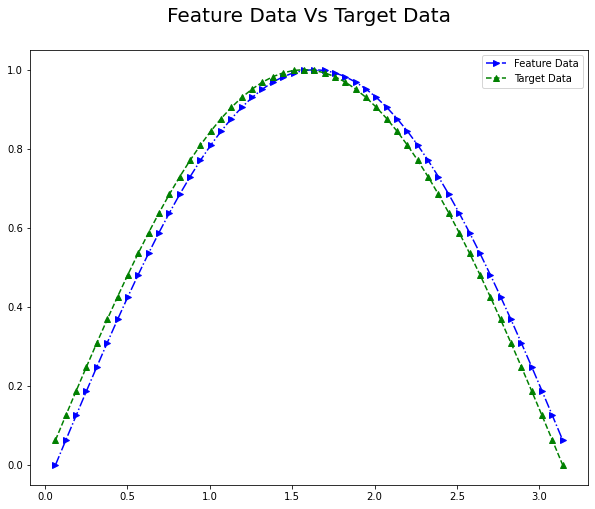

In [77]:
plt.figure(figsize=(10,8))
plt.plot(time_step[1 :],x,marker=">",color="b",label="Feature Data",linestyle="-.")
plt.plot(time_step[1 :],y,marker="^",color="g",label="Target Data",linestyle="--")
plt.title("Feature Data Vs Target Data\n",color="black",fontsize=20)
plt.legend(loc="best")
plt.show()



```
* The super() function in Python makes class inheritance more manageable and extensible. 
* The function returns a temporary object that allows reference to a parent class by the keyword super. 
* The super() function has two major use cases: To avoid the usage of the super (parent) class explicitly
```



In [78]:
class RNN(nn.Module):

  def __init__(self,input_size,output_size,hidden_dim,num_layer):
    super(RNN,self).__init__()
    self.hidden_dim=hidden_dim
    # self.num_layer=num_layer
    # self.input_size=input_size

    # self.rnn=nn.RNN(input_size,output_size,hidden_dim,num_layer)
    self.rnn = nn.RNN(input_size, hidden_dim, num_layer, batch_first=True)
    self.fc = nn.Linear(hidden_dim, output_size)

  def forward(self,x,hidden):
    batch_size= x.size(0)
    out,hidden=self.rnn(x,hidden)
    out=out.view(-1,self.hidden_dim)
    output=self.fc(out)
    return output,hidden



In [79]:
test_rnn=RNN(input_size=1,output_size=1,hidden_dim=20,num_layer=2)

In [80]:
len=50 #number of ovserbation
time_step=np.linspace(0,np.pi,len)
data=np.sin(time_step)
data.resize((len,1))

In [81]:
data

array([[0.00000000e+00],
       [6.40702200e-02],
       [1.27877162e-01],
       [1.91158629e-01],
       [2.53654584e-01],
       [3.15108218e-01],
       [3.75267005e-01],
       [4.33883739e-01],
       [4.90717552e-01],
       [5.45534901e-01],
       [5.98110530e-01],
       [6.48228395e-01],
       [6.95682551e-01],
       [7.40277997e-01],
       [7.81831482e-01],
       [8.20172255e-01],
       [8.55142763e-01],
       [8.86599306e-01],
       [9.14412623e-01],
       [9.38468422e-01],
       [9.58667853e-01],
       [9.74927912e-01],
       [9.87181783e-01],
       [9.95379113e-01],
       [9.99486216e-01],
       [9.99486216e-01],
       [9.95379113e-01],
       [9.87181783e-01],
       [9.74927912e-01],
       [9.58667853e-01],
       [9.38468422e-01],
       [9.14412623e-01],
       [8.86599306e-01],
       [8.55142763e-01],
       [8.20172255e-01],
       [7.81831482e-01],
       [7.40277997e-01],
       [6.95682551e-01],
       [6.48228395e-01],
       [5.98110530e-01],


In [82]:
data.shape

(50, 1)



*   The ".unsqueeze()" method is used to add a dimension to the tensor. It adds an extra dimension of size 1 at the specified position.

* For example, if the tensor has shape (3,), then tensor.unsqueeze(0) would add a dimension of size 1 at the 0th position and produce a tensor of shape (1, 3).


```
import torch

# Creating a tensor of shape (3,)
data = torch.tensor([1, 2, 3])
print("Original tensor shape: ", data.shape)

# Adding a dimension of size 1 at the 0th position
data = data.unsqueeze(0)
print("Tensor shape after unsqueeze: ", data.shape)

# Output:
# Original tensor shape:  torch.Size([3])
# Tensor shape after unsqueeze:  torch.Size([1, 3])

```





In [83]:
test_tensor_data=torch.Tensor(data).unsqueeze(0)

In [84]:
test_tensor_data

tensor([[[0.0000e+00],
         [6.4070e-02],
         [1.2788e-01],
         [1.9116e-01],
         [2.5365e-01],
         [3.1511e-01],
         [3.7527e-01],
         [4.3388e-01],
         [4.9072e-01],
         [5.4553e-01],
         [5.9811e-01],
         [6.4823e-01],
         [6.9568e-01],
         [7.4028e-01],
         [7.8183e-01],
         [8.2017e-01],
         [8.5514e-01],
         [8.8660e-01],
         [9.1441e-01],
         [9.3847e-01],
         [9.5867e-01],
         [9.7493e-01],
         [9.8718e-01],
         [9.9538e-01],
         [9.9949e-01],
         [9.9949e-01],
         [9.9538e-01],
         [9.8718e-01],
         [9.7493e-01],
         [9.5867e-01],
         [9.3847e-01],
         [9.1441e-01],
         [8.8660e-01],
         [8.5514e-01],
         [8.2017e-01],
         [7.8183e-01],
         [7.4028e-01],
         [6.9568e-01],
         [6.4823e-01],
         [5.9811e-01],
         [5.4553e-01],
         [4.9072e-01],
         [4.3388e-01],
         [3

In [85]:
test_tensor_data.shape

torch.Size([1, 50, 1])

In [86]:
test_data_output,test_rnn_hidden=test_rnn(test_tensor_data,None)

In [87]:
test_data_output.size()

torch.Size([50, 1])

In [88]:
test_rnn_hidden.size()

torch.Size([2, 1, 20])

In [89]:
input_size=1
output_size=1
hidden_dim=50
num_layer=1

In [90]:
model=RNN(input_size,output_size,hidden_dim,num_layer)

In [91]:
model

RNN(
  (rnn): RNN(1, 50, batch_first=True)
  (fc): Linear(in_features=50, out_features=1, bias=True)
)

In [92]:
result=nn.MSELoss()

In [93]:
optimizer=torch.optim.Adam(model.parameters(),lr=0.001)

In [94]:
def train_model(model,num_step,get_return):
  hidden=None
 

  for batch_initializer,step in enumerate(range(num_step)):

    time_step=np.linspace(step*np.pi,(step+1)*np.pi, len+1)
    data=np.sin(time_step)
    data.resize((len+1,1))
    x=data[: -1] #train_data
    y=data[1 : ] # target_data

    x_tensor=torch.Tensor(x).unsqueeze(0)
    y_tensor=torch.Tensor(y)

    output,hidden=model(x_tensor,hidden)

   
    hidden=hidden.data
    loss=result(output,y_tensor)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if batch_initializer%get_return==0:
      print("Loss :",loss.item())
      plt.figure(figsize=(10,6))

      plt.plot(time_step[1 :],x,marker="8",color="g",linestyle="-.")
      plt.plot(time_step[1 :],output.data.numpy().flatten(),marker="s",color="m",linestyle="--")
      plt.show()

  return model


In [95]:
num_step=80
get_return=20

Loss : 0.5957962274551392


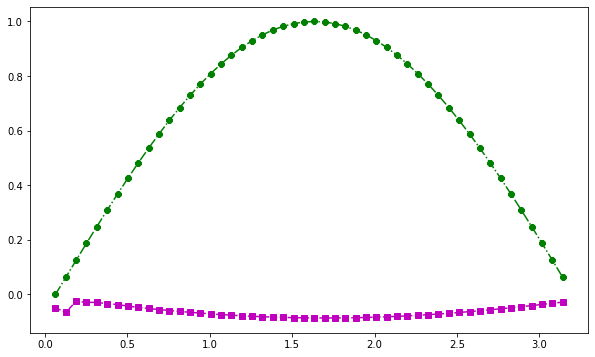

Loss : 0.18443191051483154


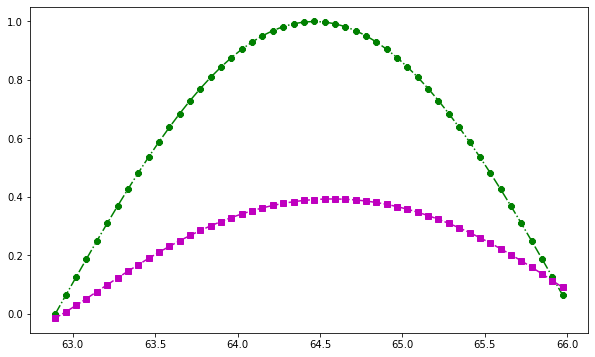

Loss : 0.033600062131881714


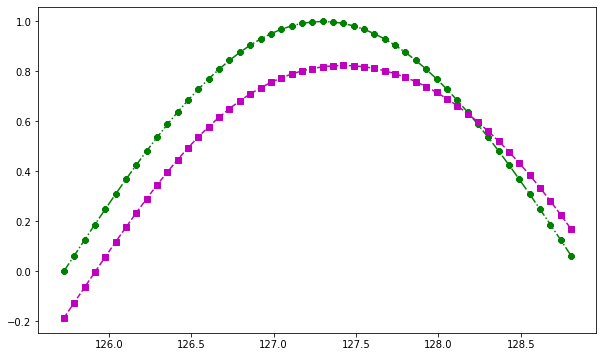

Loss : 0.017382672056555748


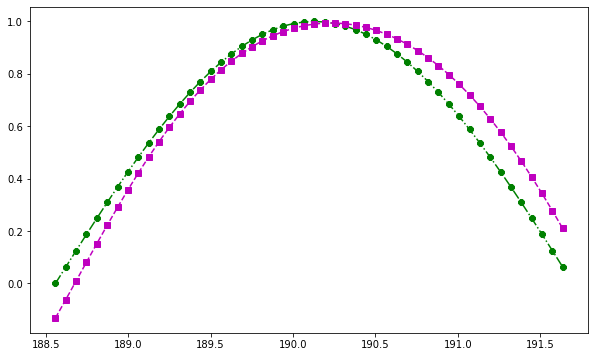

RNN(
  (rnn): RNN(1, 50, batch_first=True)
  (fc): Linear(in_features=50, out_features=1, bias=True)
)

In [96]:
train_model(model,num_step,get_return)